In [8]:
import pandas as pd

# 데이터 불러오기
file_path = '규모_학력.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 데이터 확인
print(data.head())

            규모별  학력별  성별       연령      2023    2023.1      2023.2  \
0           규모별  학력별  성별       연령  평균연령 (세)  근로일수 (일)  총근로시간 (시간)   
1  1 규모(5 ~ 9인)   고졸  전체  20 ~ 24      22.4      19.0       146.3   
2  1 규모(5 ~ 9인)   고졸  전체  25 ~ 29      27.0      20.8       169.6   
3  1 규모(5 ~ 9인)   고졸  전체  30 ~ 34      31.9      21.6       175.0   
4  1 규모(5 ~ 9인)   고졸  전체  35 ~ 39      37.0      21.6       174.8   

         2023.3       2023.4       2023.5      2023.6  
0  소정실근로시간 (시간)  초과근로시간 (시간)  휴일근로시간 (시간)  월임금총액 (천원)  
1         140.6          5.8          1.6        1966  
2         162.3          7.3          1.6        2476  
3         166.9          8.1          2.5        2753  
4         167.6          7.2          2.5        2976  


In [18]:
# 컬럼 이름 변경
data.columns = ['회사규모', '학력별', '성별', '연령', '평균연령', '근로일수',
                '총근로시간', '소정실근로시간', '초과근로시간', '휴일근로시간', '월임금총액']

# '월임금총액' 컬럼을 숫자로 변환
data['월임금총액'] = pd.to_numeric(data['월임금총액'], errors='coerce')

# '월임금총액' 컬럼에 결측값이 있는 행 제거
data = data.dropna(subset=['월임금총액'])

# 학력 순서 재정렬
data['학력별'] = pd.Categorical(data['학력별'], categories=['고졸', '전문대졸', '대졸이상'], ordered=True)

# 회사 규모와 학력별로 그룹화하여 평균 임금 계산
grouped_data = data.groupby(['회사규모', '학력별'])['월임금총액'].mean().reset_index()

print(grouped_data)

                 회사규모   학력별        월임금총액
0        1 규모(5 ~ 9인)    고졸  2760.888889
1        1 규모(5 ~ 9인)  전문대졸  3006.407407
2        1 규모(5 ~ 9인)  대졸이상  3648.629630
3     2 규모 (10 ~ 29인)    고졸  2965.111111
4     2 규모 (10 ~ 29인)  전문대졸  3284.333333
5     2 규모 (10 ~ 29인)  대졸이상  4216.111111
6     3 규모(30 ~ 99 인)    고졸  3036.185185
7     3 규모(30 ~ 99 인)  전문대졸  3530.444444
8     3 규모(30 ~ 99 인)  대졸이상  4571.407407
9   4 규모(100 ~ 299 인)    고졸  3301.518519
10  4 규모(100 ~ 299 인)  전문대졸  3864.259259
11  4 규모(100 ~ 299 인)  대졸이상  5008.777778
12  5 규모(300 ~ 499 인)    고졸  3699.703704
13  5 규모(300 ~ 499 인)  전문대졸  4288.888889
14  5 규모(300 ~ 499 인)  대졸이상  5490.074074
15      6 규모(500인 이상)    고졸  4920.037037
16      6 규모(500인 이상)  전문대졸  5586.222222
17      6 규모(500인 이상)  대졸이상  6777.666667


전체 평균 월급(규모별)

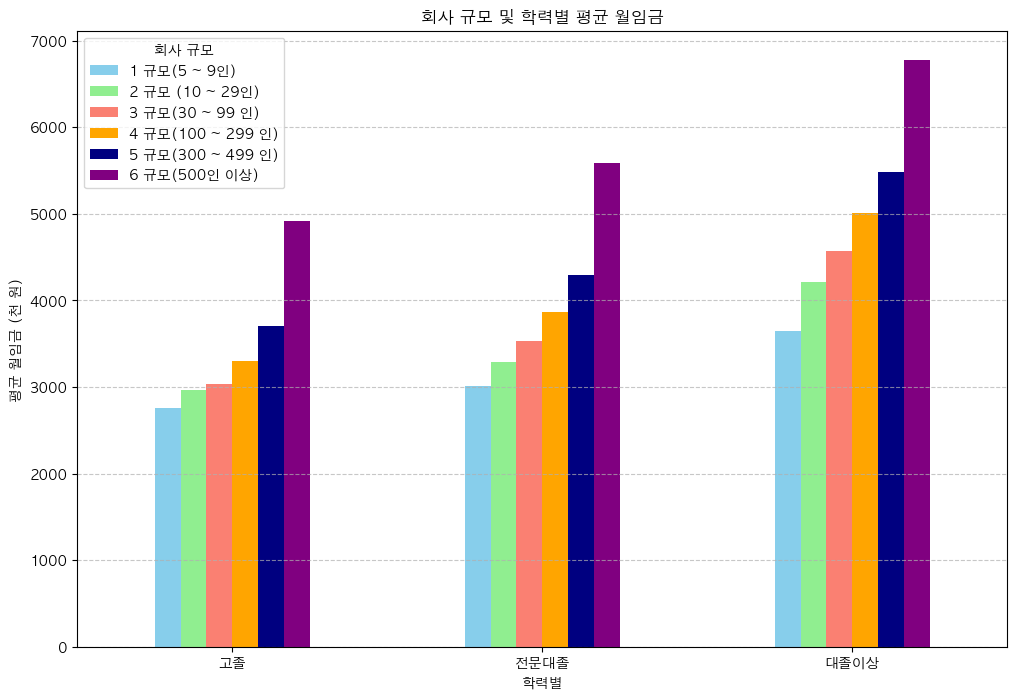

In [15]:
import matplotlib.pylab as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 피벗 테이블 생성
pivot_data = grouped_data.pivot(index='학력별', columns='회사규모', values='월임금총액')

# 학력 순서 재정렬
pivot_data = pivot_data.reindex(['고졸', '전문대졸', '대졸이상'])

# 그래프 시각화
pivot_data.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'navy', 'purple'])

plt.xlabel('학력별')
plt.ylabel('평균 월임금 (천 원)')
plt.title('회사 규모 및 학력별 평균 월임금')
plt.xticks(rotation=0)
plt.legend(title='회사 규모')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

남자 평균 월급(규모별)

In [21]:
import pandas as pd

# 데이터 불러오기
file_path = '규모_학력.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 컬럼 이름 변경
data.columns = ['회사규모', '학력별', '성별', '연령', '평균연령', '근로일수',
                '총근로시간', '소정실근로시간', '초과근로시간', '휴일근로시간', '월임금총액']

# '월임금총액' 컬럼을 숫자로 변환
data['월임금총액'] = pd.to_numeric(data['월임금총액'], errors='coerce')

# '월임금총액' 컬럼에 결측값이 있는 행 제거
data = data.dropna(subset=['월임금총액'])

# 학력 순서 재정렬
data['학력별'] = pd.Categorical(data['학력별'], categories=['고졸', '전문대졸', '대졸이상'], ordered=True)


# 성별이 남자인 데이터 필터링
male_data = data[data['성별'] == '남']

# 회사 규모별로 그룹화하여 남자의 평균 월임금 계산
grouped_male_data = male_data.groupby(['회사규모', '학력별'])['월임금총액'].mean().reset_index()

print(grouped_male_data)

                 회사규모   학력별        월임금총액
0        1 규모(5 ~ 9인)    고졸  3080.000000
1        1 규모(5 ~ 9인)  전문대졸  3380.333333
2        1 규모(5 ~ 9인)  대졸이상  4171.111111
3     2 규모 (10 ~ 29인)    고졸  3367.000000
4     2 규모 (10 ~ 29인)  전문대졸  3760.777778
5     2 규모 (10 ~ 29인)  대졸이상  4795.666667
6     3 규모(30 ~ 99 인)    고졸  3541.000000
7     3 규모(30 ~ 99 인)  전문대졸  4109.222222
8     3 규모(30 ~ 99 인)  대졸이상  5167.777778
9   4 규모(100 ~ 299 인)    고졸  3900.777778
10  4 규모(100 ~ 299 인)  전문대졸  4583.444444
11  4 규모(100 ~ 299 인)  대졸이상  5750.777778
12  5 규모(300 ~ 499 인)    고졸  4377.444444
13  5 규모(300 ~ 499 인)  전문대졸  4928.888889
14  5 규모(300 ~ 499 인)  대졸이상  5993.000000
15      6 규모(500인 이상)    고졸  5738.888889
16      6 규모(500인 이상)  전문대졸  6263.666667
17      6 규모(500인 이상)  대졸이상  7453.888889


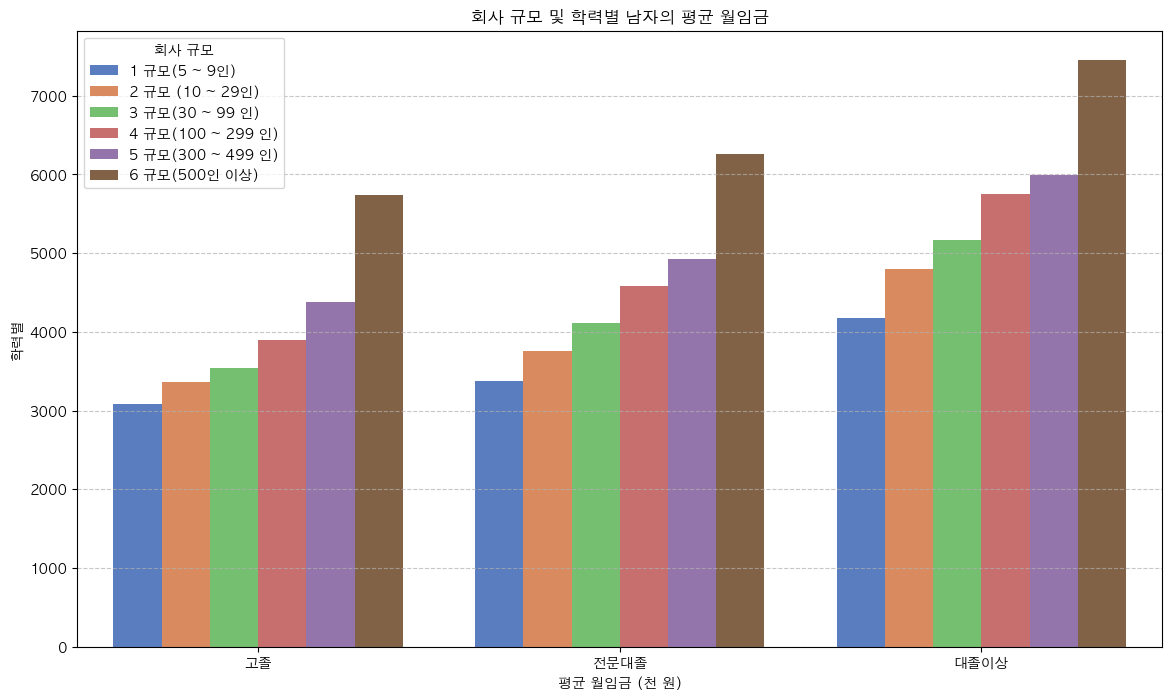

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=grouped_male_data, palette='muted')

plt.xlabel('학력별')
plt.ylabel('평균 월임금 (천 원)')
plt.title('회사 규모 및 학력별 남자의 평균 월임금')
plt.legend(title='회사 규모')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

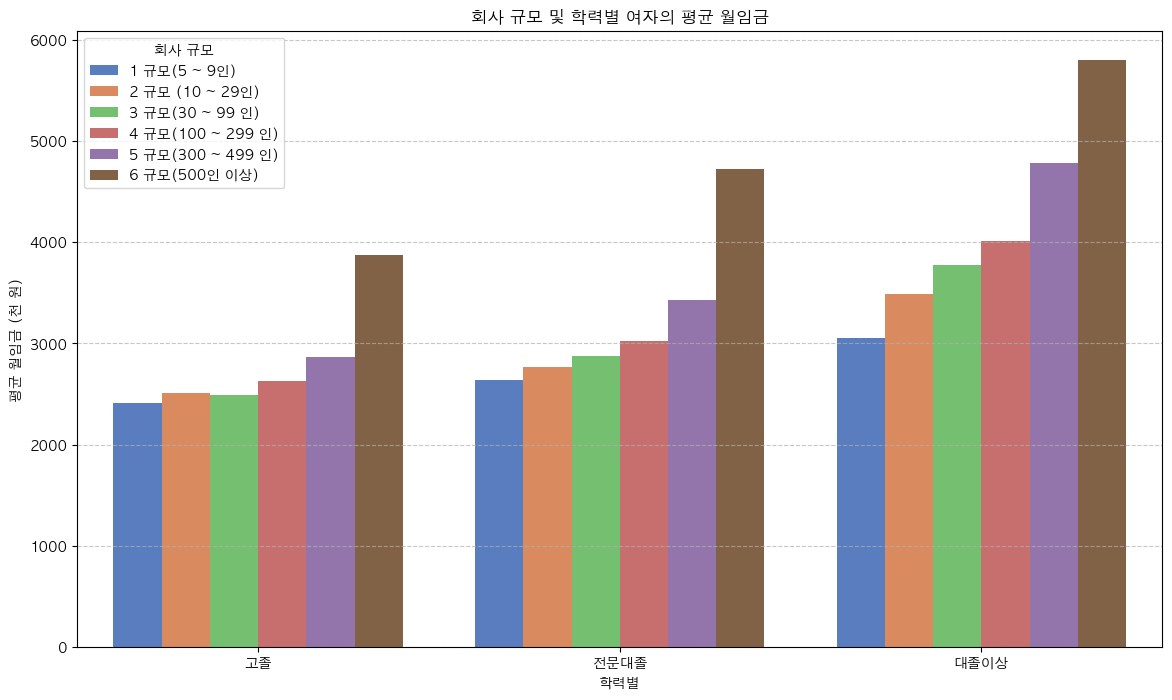

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = '규모_학력.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 컬럼 이름 변경
data.columns = ['회사규모', '학력별', '성별', '연령', '평균연령', '근로일수',
                '총근로시간', '소정실근로시간', '초과근로시간', '휴일근로시간', '월임금총액']

# '월임금총액' 컬럼을 숫자로 변환
data['월임금총액'] = pd.to_numeric(data['월임금총액'], errors='coerce')

# '월임금총액' 컬럼에 결측값이 있는 행 제거
data = data.dropna(subset=['월임금총액'])

# 학력 순서 재정렬
data['학력별'] = pd.Categorical(data['학력별'], categories=['고졸', '전문대졸', '대졸이상'], ordered=True)

# 성별이 여자인 데이터 필터링
female_data = data[data['성별'] == '여']

# 회사 규모별 학력별로 그룹화하여 여자의 평균 월임금 계산
grouped_female_data = female_data.groupby(['회사규모', '학력별'])['월임금총액'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=grouped_female_data, palette='muted')

plt.xlabel('학력별')
plt.ylabel('평균 월임금 (천 원)')
plt.title('회사 규모 및 학력별 여자의 평균 월임금')
plt.legend(title='회사 규모')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/5v/84j80039417cb28c_fpx0f740000gn/T/ipykernel_78041/2015053174.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=combined_data, palette='muted', ci=None)
/var/folders/5v/84j80039417cb28c_fpx0f740000gn/T/ipykernel_78041/2015053174.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=sub_data, palette='muted', ci=None,
/var/folders/5v/84j80039417cb28c_fpx0f740000gn/T/ipykernel_78041/2015053174.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=sub_data, palette='muted', ci=None,


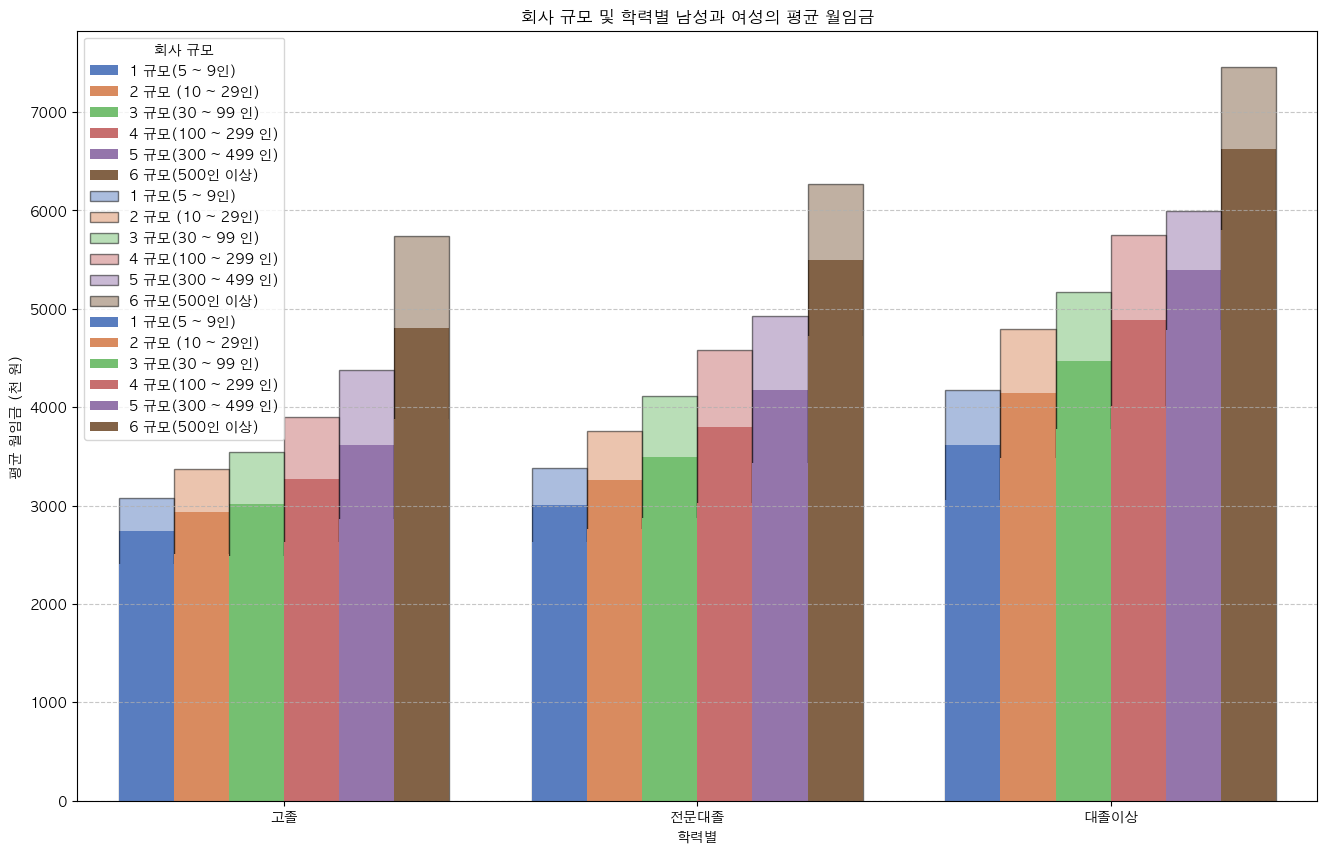

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = '규모_학력.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 컬럼 이름 변경
data.columns = ['회사규모', '학력별', '성별', '연령', '평균연령', '근로일수',
                '총근로시간', '소정실근로시간', '초과근로시간', '휴일근로시간', '월임금총액']

# '월임금총액' 컬럼을 숫자로 변환
data['월임금총액'] = pd.to_numeric(data['월임금총액'], errors='coerce')

# '월임금총액' 컬럼에 결측값이 있는 행 제거
data = data.dropna(subset=['월임금총액'])

# 학력 순서 재정렬
data['학력별'] = pd.Categorical(data['학력별'], categories=['고졸', '전문대졸', '대졸이상'], ordered=True)

# 성별에 따른 데이터 분리
male_data = data[data['성별'] == '남']
female_data = data[data['성별'] == '여']

# 회사 규모별 학력별로 그룹화하여 평균 월임금 계산
grouped_male_data = male_data.groupby(['회사규모', '학력별'])['월임금총액'].mean().reset_index()
grouped_female_data = female_data.groupby(['회사규모', '학력별'])['월임금총액'].mean().reset_index()

# 성별 컬럼 추가
grouped_male_data['성별'] = '남'
grouped_female_data['성별'] = '여'

# 남성 및 여성 데이터 결합
combined_data = pd.concat([grouped_male_data, grouped_female_data])

# 그래프 시각화
plt.figure(figsize=(16, 10))
sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=combined_data, palette='muted', ci=None)

# 성별에 따른 색상 변경
for i, gender in enumerate(combined_data['성별'].unique()):
    sub_data = combined_data[combined_data['성별'] == gender]
    sns.barplot(x='학력별', y='월임금총액', hue='회사규모', data=sub_data, palette='muted', ci=None, 
                alpha=0.5 if gender == '남' else 1.0, edgecolor='black' if gender == '남' else None, linewidth=1)

plt.xlabel('학력별')
plt.ylabel('평균 월임금 (천 원)')
plt.title('회사 규모 및 학력별 남성과 여성의 평균 월임금')
plt.legend(title='회사 규모')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()